In [2]:
# Import text from Excel worksheet.

import pandas as pd

file_path = "SampleDocuments2.xlsx"
file_df = pd.read_excel(file_path)
file_df

,doc_id,doc_text
0,1,The cat (Felis catus) is a domestic species of...
1,2,It is the only domesticated species in the fam...
2,3,Cats are commonly kept as house pets but can a...
3,4,Domestic cats are valued by humans for compani...


In [3]:
# Only needs to run if package not already installed.

!pip install spacy

In [4]:
# Only needs to run if not already installed.

!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
# Split text in each cell into lists with separate sentences.

import spacy

nlp = spacy.load("en_core_web_sm")
file_df["doc_text"] = file_df["doc_text"].apply(lambda x: [sent.text for sent in nlp(x).sents])
file_df

,doc_id,doc_text
0,1,[The cat (Felis catus) is a domestic species o...
1,2,[It is the only domesticated species in the fa...
2,3,[Cats are commonly kept as house pets but can ...
3,4,[Domestic cats are valued by humans for compan...


In [6]:
# Put each sentence into a separate row in the dataframe.

file_df = file_df.explode("doc_text", ignore_index=True)

# Update the column headings.

file_df.rename(columns={"doc_text": "sent_text"}, inplace=True)
file_df.index.name = "sent_id"

# Show the contents of the dataframe.

file_df

,doc_id,sent_text
sent_id,,
0,1,The cat (Felis catus) is a domestic species of...
1,1,The dog (Canis familiaris[4][5] or Canis lupus...
2,1,A computer is a machine that can be programmed...
3,2,It is the only domesticated species in the fam...
4,2,"Also called the domestic dog, it is derived fr..."
5,2,Modern digital electronic computers can perfor...
6,3,Cats are commonly kept as house pets but can a...
7,3,Dogs were the first species to be domesticated...
8,3,These programs enable computers to perform a w...


In [7]:
# Add the sentence text and IDs to lists for further processing.

sent_id = file_df.index.values.tolist()
sent_text = file_df.sent_text.values.tolist()
sent_id

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [ ]:
# Only needs to run if not already installed.

!pip install sentence-transformers

In [8]:
# Select the model to use for sentence embeddings.

from sentence_transformers import SentenceTransformer

# Models - https://huggingface.co/models?library=sentence-transformers
model = SentenceTransformer('all-mpnet-base-v2')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
# Create the sentence embeddings

embeddings1 = model.encode(sent_text)

In [10]:
# clustering https://www.youtube.com/watch?v=OlhNZg4gOvA time index 22:00

from sklearn.cluster import KMeans
import numpy as np

# normalize the embeddings to unit length
embeddings_norm = embeddings1 / np.linalg.norm(embeddings1, axis=1, keepdims=True)

# Show the embeddings dataframe.
embeddings_norm

array([[-0.00439168,  0.03730018, -0.00832698, ...,  0.06012901,
         0.05588695, -0.03074687],
       [ 0.00139505, -0.01426286, -0.00580775, ...,  0.03672076,
         0.03725247, -0.00364631],
       [-0.01490694,  0.07147519, -0.01173318, ...,  0.04738555,
         0.01796243, -0.0352524 ],
       ...,
       [ 0.03970145,  0.00837467,  0.01572064, ...,  0.04809453,
        -0.01922224, -0.00996134],
       [-0.01320442,  0.02343227,  0.0098662 , ...,  0.03478407,
         0.00996889, -0.02609491],
       [-0.0422748 , -0.05179689, -0.01553573, ...,  0.01847666,
         0.0055196 , -0.03248132]], dtype=float32)

In [11]:
# Import the libraries needed to create the elbow diagram.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

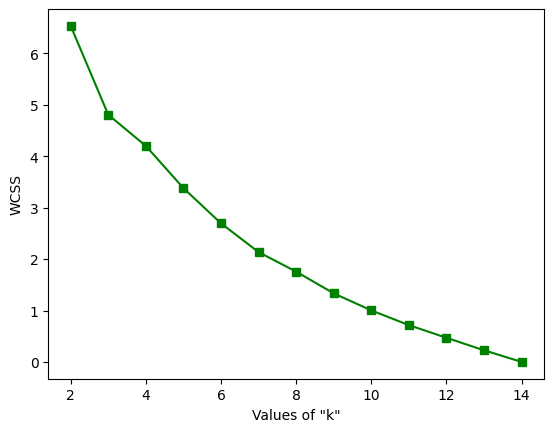

In [12]:
# Look at the elbow diagram to help determine appropriate number of clusters to create.

# determining the maximum number of clusters
# using the simple method
limit = file_df.shape[0]

# selecting optimal value of 'k'
# using elbow method

# wcss - within cluster sum of
# squared distances
wcss = {}

for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(embeddings_norm)
    wcss[k] = model.inertia_

# plotting the wcss values
# to find out the elbow value
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Create the desired number of clusters. (Update the value for ClusterCount.)

ClusterCount = 4

clustering_model = KMeans(n_clusters=ClusterCount)
clustering_model.fit(embeddings_norm)
cluster_assignment = clustering_model.labels_
print(cluster_assignment)

[1 2 3 1 2 3 1 2 3 1 1 2 0 0]


In [14]:
# Add the cluster assignments to the dataframe in a new column.

file_df['cluster8'] = cluster_assignment
file_df

,doc_id,sent_text,cluster8
sent_id,,,
0,1,The cat (Felis catus) is a domestic species of...,1
1,1,The dog (Canis familiaris[4][5] or Canis lupus...,2
2,1,A computer is a machine that can be programmed...,3
3,2,It is the only domesticated species in the fam...,1
4,2,"Also called the domestic dog, it is derived fr...",2
5,2,Modern digital electronic computers can perfor...,3
6,3,Cats are commonly kept as house pets but can a...,1
7,3,Dogs were the first species to be domesticated...,2
8,3,These programs enable computers to perform a w...,3


In [15]:
# Get file path in preparation for saving output to Excel.

import os

OutputFile = os.path.split(file_path)[0] + "\\Clusters_" + os.path.split(file_path)[1]
OutputFile

'\\Clusters_SampleDocuments2.xlsx'

In [16]:
# Save the dataframe to an Excel workbook in the same folder as the original file.

with pd.ExcelWriter(OutputFile) as writer:

    # Write the scores dataframe to the Excel workbook. Leave blank rows at the top.
    file_df.to_excel(writer, sheet_name="Sheet1", startrow=0, startcol=0)

print('Done.')

Done.
